In [10]:
# pip install
!pip install -r requirements.txt

# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from pprint import pprint

# Module imports
from periodic_table import *
from utils import *
print("Imported all.")

Imported all.


# Open data files

In [11]:
# Open propmt TPC data file
file_dir = "./assets/A_Z_count-TPC_prompt.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC_prompt = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_TPC_prompt)
# Reorder columns
df_TPC_prompt = df_TPC_prompt[["Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life (ns)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

Considered delayed if created at time > 20 microseconds

In [12]:
# Open delayed TPC data file
file_dir = "./assets/A_Z_count-TPC_delayed.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC_delayed = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_TPC_delayed)
# Reorder columns
df_TPC_delayed = df_TPC_delayed[["Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life (ns)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

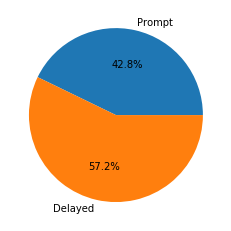

In [13]:
# Ratio of prompt to delayed counts
plt.pie(x=[df_TPC_prompt["Counts"].sum(), df_TPC_delayed["Counts"].sum()], autopct='%1.1f%%', labels=["Prompt", "Delayed"])
plt.show()

In [14]:
# Open buffer data file
file_dir = "./assets/A_Z_count-buffers.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_buffers = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_buffers)
# Reorder columns
df_buffers = df_buffers[["Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life (ns)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

# Add activity (/yr)

In [15]:
# Simulation length = years * nanoseconds
year_in_nano = (3.154 * 10**16)
year_in_sec = (3.154 * 10**7)
day_in_nano = (8.64 * 10 ** 13)
sim_length = 29.01
df_buffers["Activity (/yr)"] = df_buffers["Counts"] / sim_length
df_TPC_prompt["Activity (/yr)"] = df_TPC_prompt["Counts"] / sim_length
df_TPC_delayed["Activity (/yr)"] = df_TPC_delayed["Counts"] / sim_length

# Filter by unstable

In [16]:
# Ignore stable isotopes
unstable_buffers = df_buffers[df_buffers["Stable"] == False]
unstable_TPC_prompt = df_TPC_prompt[df_TPC_prompt["Stable"] == False]
unstable_TPC_delayed = df_TPC_delayed[df_TPC_delayed["Stable"] == False]

# Filter by realistic half-life

Find max and min half lifes

In [17]:
print(f"Min half life (nano): {unstable_TPC_delayed['Half Life (ns)'].min()}\nMax half life (day): {unstable_TPC_delayed['Half Life (ns)'].max() / day_in_nano}")

Min half life (nano): 7.91e-22
Max half life (day): 1096064814814814.9


Filter to ensure no long half lifes - not actually needed as nax half life is less than a day

In [18]:
# year * days * nanoseconds
upper_lim = 1 * 356 * day_in_nano
unstable_buffers = unstable_buffers[unstable_buffers["Half Life (ns)"] < upper_lim].sort_values("Half Life (ns)")
unstable_TPC_prompt = unstable_TPC_prompt[unstable_TPC_prompt["Half Life (ns)"] < upper_lim].sort_values("Half Life (ns)")
unstable_TPC_delayed = unstable_TPC_delayed[unstable_TPC_delayed["Half Life (ns)"] < upper_lim].sort_values("Half Life (ns)")
print(f"No. Buffers: {len(unstable_buffers)}\nNo. Unstable TPC Prompt: {len(unstable_TPC_prompt)}\nNo. Unstable TPC Delayed: {len(unstable_TPC_delayed)}\n")

No. Buffers: 138
No. Unstable TPC Prompt: 132
No. Unstable TPC Delayed: 56



# Unstable in buffer
To look for gamma rays

In [19]:
print(f"Total Activity (/yr): {unstable_TPC_delayed['Activity (/yr)'].sum()}")
unstable_buffers.sort_values("Max Q-Value", ascending=False)

Total Activity (/yr): 69985.48776284038


,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Activity (/yr)
36,B 5-14,5,14,3,1.241304e-07,False,1.250000e-02,"[[B-, 1.0, 20.644]]",20.644,red,0.103413
24,Li 3-11,3,11,3,1.241304e-07,False,8.750000e-03,"[[B-, 1.0, 20.623], [BN, 0.83, 20.119], [B2N, ...",20.623,red,0.103413
140,Al 13-36,13,36,1,4.137680e-08,False,9.000000e-02,"[[B-, 1.0, 18.264], [BN, 0.31, 12.071]]",18.264,red,0.0344709
15,B 5-8,5,8,16,6.620289e-07,False,7.700000e-01,"[[EC, 1.0, 17.98], [EA, 1.0, 0.0]]",17.980,red,0.551534
59,N 7-20,7,20,3,1.241304e-07,False,1.360000e-01,"[[B-, 1.0, 17.968], [BN, 0.429, 10.359]]",17.968,red,0.103413
...,...,...,...,...,...,...,...,...,...,...,...
37,C 6-14,6,14,1001,4.141818e-05,False,1.800000e+11,"[[B-, 1.0, 0.156]]",0.156,red,34.5053
32,Be 4-13,4,13,5,2.068840e-07,False,2.700000e-21,"[[N, None, 0.1]]",0.100,red,0.172354
14,Be 4-8,4,8,2511,1.038972e-04,False,8.520000e-17,"[[A, 1.0, 0.092]]",0.092,red,86.5564
20,Li 3-10,3,10,6,2.482608e-07,False,0.000000e+00,"[[N, 1.0, 0.025]]",0.025,red,0.206825


# Look for important unstable delayed isotopes in TPC

In [20]:
unstable_TPC_delayed[unstable_TPC_delayed["Activity (/yr)"] >= 0.01].sort_values("Activity (/yr)", ascending=False)
unstable_TPC_delayed

,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Activity (/yr)
0,He 2-5,2,5,3,3.958421e-07,False,7.910000e-22,"[[A, 1.0, 0.89], [N, 1.0, 0.89]]",0.890,red,0.103413
4,Be 4-8,4,8,323,4.261900e-05,False,8.520000e-17,"[[A, 1.0, 0.092]]",0.092,red,11.1341
9,B 5-12,5,12,3,3.958421e-07,False,2.020000e-02,"[[B-, 1.0, 13.369], [B3A, 0.0158, 0.0]]",13.369,red,0.103413
57,Al 13-32,13,32,1,1.319474e-07,False,3.300000e-02,"[[B-, 1.0, 13.019], [BN, 0.006999999999999999,...",13.019,red,0.0344709
32,F 9-24,9,24,2,2.638947e-07,False,3.900000e-01,"[[B-, 1.0, 13.511], [BN, 0.059000000000000004,...",13.511,red,0.0689417
53,Al 13-31,13,31,10,1.319474e-06,False,6.440000e-01,"[[B-, 1.0, 7.995]]",7.995,red,0.344709
68,Si 14-35,14,35,3,3.958421e-07,False,7.800000e-01,"[[B-, 1.0, 10.497], [BN, 0.05, 10.497]]",10.497,red,0.103413
3,Li 3-8,3,8,29,3.826473e-06,False,8.400000e-01,"[[B-, 1.0, 16.005], [BA, 1.0, 0.0]]",16.005,red,0.999655
38,Na 11-26,11,26,10,1.319474e-06,False,1.070000e+00,"[[B-, 1.0, 9.352]]",9.352,red,0.344709
46,Mg 12-29,12,29,7,9.236315e-07,False,1.300000e+00,"[[B-, 1.0, 7.596]]",7.596,red,0.241296


# Calculate number of decays

In [48]:

unstable_TPC_delayed["Decays (/yr)"] = unstable_TPC_delayed["Counts"] - unstable_TPC_delayed["Counts"] * np.e ** (-np.log(2)/(unstable_TPC_delayed["Half Life (ns)"] * 10 ** -9) * year_in_sec)
unstable_TPC_delayed.sort_values("Half Life (ns)")

,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Activity (/yr),Decays (/yr)
0,He 2-5,2,5,3,3.958421e-07,False,7.910000e-22,"[[A, 1.0, 0.89], [N, 1.0, 0.89]]",0.890,red,0.103413,3
4,Be 4-8,4,8,323,4.261900e-05,False,8.520000e-17,"[[A, 1.0, 0.092]]",0.092,red,11.1341,323
9,B 5-12,5,12,3,3.958421e-07,False,2.020000e-02,"[[B-, 1.0, 13.369], [B3A, 0.0158, 0.0]]",13.369,red,0.103413,3
57,Al 13-32,13,32,1,1.319474e-07,False,3.300000e-02,"[[B-, 1.0, 13.019], [BN, 0.006999999999999999,...",13.019,red,0.0344709,1
32,F 9-24,9,24,2,2.638947e-07,False,3.900000e-01,"[[B-, 1.0, 13.511], [BN, 0.059000000000000004,...",13.511,red,0.0689417,2
53,Al 13-31,13,31,10,1.319474e-06,False,6.440000e-01,"[[B-, 1.0, 7.995]]",7.995,red,0.344709,10
68,Si 14-35,14,35,3,3.958421e-07,False,7.800000e-01,"[[B-, 1.0, 10.497], [BN, 0.05, 10.497]]",10.497,red,0.103413,3
3,Li 3-8,3,8,29,3.826473e-06,False,8.400000e-01,"[[B-, 1.0, 16.005], [BA, 1.0, 0.0]]",16.005,red,0.999655,29
38,Na 11-26,11,26,10,1.319474e-06,False,1.070000e+00,"[[B-, 1.0, 9.352]]",9.352,red,0.344709,10
46,Mg 12-29,12,29,7,9.236315e-07,False,1.300000e+00,"[[B-, 1.0, 7.596]]",7.596,red,0.241296,7


# Check if gamma decay spectra in correct range
~200kEv
NOTE: Gamma decay energies have been averaged (not actually representative) and need to work on empty API datasets

In [22]:
# https://nds.iaea.org/relnsd/vcharthtml/api_v0_notebook.html
# https://nds.iaea.org/relnsd/vcharthtml/api_v0_guide.html#gamma
# https://nds.iaea.org/relnsd/vcharthtml/VChartHTML.html

import plotly.express as px
import plotly.graph_objects as go

# the service URL
livechart = "https://nds.iaea.org/relnsd/v0/data?"

In [23]:
import urllib.request

def lc_read_csv(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

In [34]:
# load data into a dataframe 
df = lc_read_csv(livechart + "fields=decay_rads&nuclides=41ar&rad_types=g")
df

,energy,unc_en,intensity,unc_i,start_level_energy,end_level_energy,multipolarity,mixing_ratio,unc_mr,conversion_coeff,...,unc_hls,decay,decay_%,unc_d,q,unc_q,d_z,d_n,d_symbol,Extraction_date
0,1293.640,0.04,99.160000,0.02,1293.64,0,M2+E3,+0.118,12,6.8E-5,...,2.4,B-,100,,2492.0,0.3,19,22,K,2022-02-24
1,1677.000,0.3,0.052000,0.005,1677.0,0,E2,,NaN,1.88E-4,...,2.4,B-,100,,2492.0,0.3,19,22,K,2022-02-24
2,0.311,,0.000020,,,,,,,,...,2.4,B-,100,,2492.0,0.3,19,22,K,2022-02-24
3,3.311,,0.000270,,,,,,,,...,2.4,B-,100,,2492.0,0.3,19,22,K,2022-02-24
4,3.314,,0.000534,,,,,,,,...,2.4,B-,100,,2492.0,0.3,19,22,K,2022-02-24
5,3.591,,0.000098,,,,,,,,...,2.4,B-,100,,2492.0,0.3,19,22,K,2022-02-24
6,3.591,,0.000098,,,,,,,,...,2.4,B-,100,,2492.0,0.3,19,22,K,2022-02-24


In [43]:
average = (df["energy"] * df["intensity"]/100).sum()
average

1283.6454977370197

In [66]:
def gamma_dec(iso_sym):
    sym = iso_sym.split(" ")[0].lower()
    A = iso_sym.split(" ")[1].split("-")[1]
    df = lc_read_csv(livechart + f"fields=decay_rads&nuclides={str(A)+sym}&rad_types=g")
    if not df.empty:
        try:
            average = (df["energy"] * df["intensity"]/100).sum()
            return average
        except:
            print(df)
    return None

In [69]:
unstable_TPC_delayed["Avr Gamma Decay (keV)"] = unstable_TPC_delayed.apply(lambda x : gamma_dec(x["Iso Symbol"]), axis = 1)
unstable_TPC_delayed

   energy  unc_en intensity unc_i  start_level_energy  end_level_energy  \
0  1981.6     0.4                              1981.6                 0   

  multipolarity mixing_ratio  unc_mr conversion_coeff  ... unc_hls  decay  \
0            E2                  NaN                   ...    0.07     B-   

   decay_% unc_d      q  unc_q d_z d_n  d_symbol Extraction_date  
0      100        13500    100  10  14        Ne      2022-02-24  

[1 rows x 33 columns]
   energy  unc_en intensity unc_i start_level_energy end_level_energy  \
0   646.2     0.3                              646.2                0   
1   751.2     0.3                             1397.4            646.2   
2  1582.9     0.4                                                       
3  2100.8     0.4                                                       
4  2254.1     0.4                                                       

  multipolarity mixing_ratio  unc_mr conversion_coeff  ... unc_hls  decay  \
0                    

,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Activity (/yr),Decays (/yr),Avr Gamma Decay,Avr Gamma Decay (keV)
0,He 2-5,2,5,3,3.958421e-07,False,7.910000e-22,"[[A, 1.0, 0.89], [N, 1.0, 0.89]]",0.890,red,0.103413,3,NaN,NaN
4,Be 4-8,4,8,323,4.261900e-05,False,8.520000e-17,"[[A, 1.0, 0.092]]",0.092,red,11.1341,323,NaN,NaN
9,B 5-12,5,12,3,3.958421e-07,False,2.020000e-02,"[[B-, 1.0, 13.369], [B3A, 0.0158, 0.0]]",13.369,red,0.103413,3,52.475315,52.475315
57,Al 13-32,13,32,1,1.319474e-07,False,3.300000e-02,"[[B-, 1.0, 13.019], [BN, 0.006999999999999999,...",13.019,red,0.0344709,1,530.807100,530.807100
32,F 9-24,9,24,2,2.638947e-07,False,3.900000e-01,"[[B-, 1.0, 13.511], [BN, 0.059000000000000004,...",13.511,red,0.0689417,2,NaN,NaN
53,Al 13-31,13,31,10,1.319474e-06,False,6.440000e-01,"[[B-, 1.0, 7.995]]",7.995,red,0.344709,10,1113.967200,1113.967200
68,Si 14-35,14,35,3,3.958421e-07,False,7.800000e-01,"[[B-, 1.0, 10.497], [BN, 0.05, 10.497]]",10.497,red,0.103413,3,5497.795900,5497.795900
3,Li 3-8,3,8,29,3.826473e-06,False,8.400000e-01,"[[B-, 1.0, 16.005], [BA, 1.0, 0.0]]",16.005,red,0.999655,29,NaN,NaN
38,Na 11-26,11,26,10,1.319474e-06,False,1.070000e+00,"[[B-, 1.0, 9.352]]",9.352,red,0.344709,10,2174.801184,2174.801184
46,Mg 12-29,12,29,7,9.236315e-07,False,1.300000e+00,"[[B-, 1.0, 7.596]]",7.596,red,0.241296,7,1861.359200,1861.359200


# Filter by gamma decay energy in range of WIMP
~200 - 1000 keV

In [70]:
unstable_TPC_delayed[(unstable_TPC_delayed["Avr Gamma Decay"] > 200) & (unstable_TPC_delayed["Avr Gamma Decay"] < 1000)]

,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Activity (/yr),Decays (/yr),Avr Gamma Decay,Avr Gamma Decay (keV)
57,Al 13-32,13,32,1,1.319474e-07,False,0.033,"[[B-, 1.0, 13.019], [BN, 0.006999999999999999,...",13.019,red,0.0344709,1,530.807100,530.807100
24,F 9-21,9,21,34,4.486210e-06,False,4.160,"[[B-, 1.0, 5.684]]",5.684,red,1.17201,34,235.626091,235.626091
65,P 15-34,15,34,674,8.893252e-05,False,12.400,"[[B-, 1.0, 5.374]]",5.374,red,23.2334,674,333.548404,333.548404
20,O 8-19,8,19,9,1.187526e-06,False,26.900,"[[B-, 1.0, 4.822]]",4.822,red,0.310238,9,939.721948,939.721948
36,Na 11-25,11,25,24,3.166737e-06,False,59.100,"[[B-, 1.0, 3.835]]",3.835,red,0.827301,24,436.892953,436.892953
33,Ne 10-24,10,24,8,1.055579e-06,False,203.000,"[[B-, 1.0, 2.467]]",2.467,red,0.275767,8,541.280790,541.280790
41,Mg 12-27,12,27,42,5.541789e-06,False,567.000,"[[B-, 1.0, 2.61]]",2.610,red,1.44778,42,893.383372,893.383372
19,F 9-18,9,18,8,1.055579e-06,False,6590.000,"[[EC, 1.0, 1.655]]",1.655,red,0.275767,8,988.580600,988.580600
92,K 19-42,19,42,13,1.715316e-06,False,44400.000,"[[B-, 1.0, 3.526]]",3.526,red,0.448121,13,278.695817,278.695817
